AutoGluon-TimeSeries: Every Time Series Forecasting Model In One Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import subprocess

In [2]:
from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas
from gluonts.evaluation.metrics import mse
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = get_dataset("tourism_monthly")


Download tourism_monthly_dataset.zip:: 200kB [00:03, 66.1kB/s]
creating json files: 100%|██████████| 366/366 [00:00<00:00, 313608.84it/s]


In [8]:
dataset.train

Map(fn=<gluonts.dataset.common.ProcessDataEntry object at 0x13f7e0100>, iterable=JsonLinesFile(path=PosixPath('/Users/blessingmagabane/.gluonts/datasets/tourism_monthly/train/data.json.gz'), start=0, n=None, line_starts=[np.int16(0), np.int16(1647), np.int16(3183), np.int16(5186), np.int16(7165), np.int16(9162), np.int16(11159), np.int16(13097), np.int16(15234), np.int16(17185), np.int16(19157), np.int16(21148), np.int16(23132), np.int16(25313), np.int16(27468), np.int16(29179), np.int16(31054), np.int16(-32762), np.int16(-31139), np.int16(-28607), np.int16(-26147), np.int16(-23837), np.int16(-21468), np.int16(-19163), np.int16(-16924), np.int16(-14701), np.int16(-12561), np.int16(-10355), np.int16(-8177), np.int16(-5921), np.int16(-3417), np.int16(-1176), np.int16(1316), np.int16(3633), np.int16(6082), np.int16(8523), np.int16(11292), np.int16(13765), np.int16(16213), np.int16(18382), np.int16(20645), np.int16(22831), np.int16(24960), np.int16(27090), np.int16(29173), np.int16(31215),

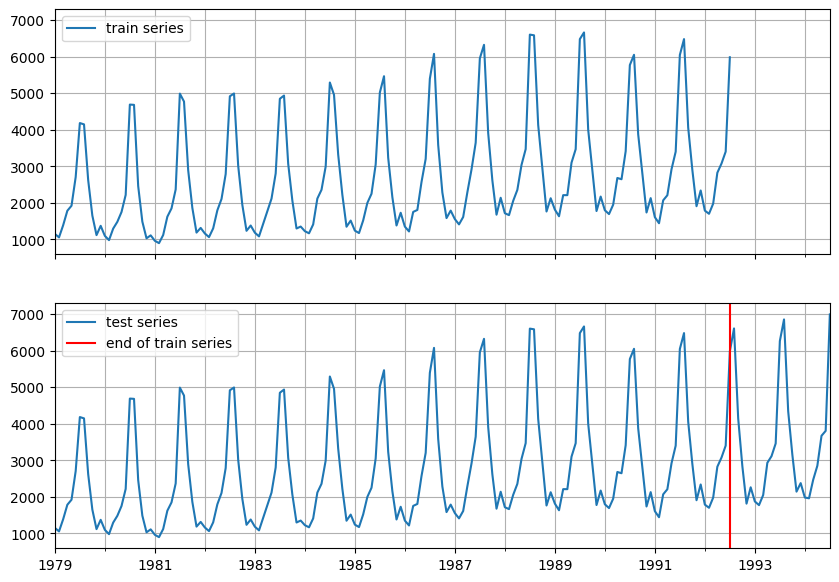

In [4]:
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color="r")
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

Preprocess Data

In [28]:
train_data = TimeSeriesDataFrame.from_data_frame(
    dataset.train,
    id_column="item_id",
    timestamp_column="start"
)

test_data = TimeSeriesDataFrame.from_data_frame(
    dataset.test,
    id_column="item_id",
    timestamp_column="start"
)

test_data.head()

target
item_id timestamp              
0       1979-01-31  1149.869995
        1979-02-28  1053.800171
        1979-03-31  1388.879761
        1979-04-30  1783.370239
        1979-05-31  1921.025146

In [14]:
%%time
multiple_timeseries_path = "multiple-timeseries"
model_path_fast = "tourism-quarterly-fast"
path = os.path.join(multiple_timeseries_path, model_path_fast)

predictor = TimeSeriesPredictor(
    prediction_length=24,
    #path = "multiple_timeseries_path/tourism-quarterly-fast"
    path= path,
    target="target",
    eval_metric="MSE"
)

predictor.fit(
    train_data,
    presets="fast_training",
    random_seed=42
)

Beginning AutoGluon training...
AutoGluon will save models to '/Users/blessingmagabane/Documents/Time Series/tourism2/multiple-timeseries/tourism-quarterly-fast'
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.0.0: Tue Sep 24 23:36:26 PDT 2024; root:xnu-11215.1.12~1/RELEASE_ARM64_T8103
CPU Count:          8
GPU Count:          0
Memory Avail:       1.63 GB / 8.00 GB (20.4%)
Disk Space Avail:   17.42 GB / 228.27 GB (7.6%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MSE,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 42,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'verbosit

CPU times: user 15.1 s, sys: 4.37 s, total: 19.5 s
Wall time: 15.7 s


Model Evaluation

In [15]:
predictions = predictor.predict(train_data, random_seed=42)
predictions

Model not specified in predict, will default to the model with the best validation score: Theta


mean          0.1          0.2          0.3  \
item_id timestamp                                                        
0       1992-08-31  6565.103773  6050.365944  6202.824056  6315.162183   
        1992-09-30  4009.649463  3631.218931  3772.977226  3844.381355   
        1992-10-31  2684.411539  2372.502089  2489.535813  2558.092282   
        1992-11-30  1715.721483  1536.210210  1584.904656  1623.495467   
        1992-12-31  2012.211044  1803.586574  1874.680634  1922.282022   
...                         ...          ...          ...          ...   
365     2000-08-31  3622.616533 -1205.203854   146.508014  1193.281839   
        2000-09-30  3025.188700 -1759.356762  -399.600472   695.666375   
        2000-10-31  1982.933137  -692.340791  -102.333861   460.219470   
        2000-11-30  1329.209047  -678.187418    46.595471   437.267600   
        2000-12-31  1469.518673  -824.267136  -166.950833   314.540028   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
0       1992-08-31  6466.533543  6587.838275  6718.046629  6833.981620   
        1992-09-30  3908.080609  3989.901887  4055.345624  4118.656376   
        1992-10-31  2617.452539  2668.476078  2720.413830  2777.817706   
        1992-11-30  1657.695443  1691.496398  1717.970073  1755.889493   
        1992-12-31  1958.152959  1999.375935  2035.982128  2084.551224   
...                         ...          ...          ...          ...   
365     2000-08-31  1830.607631  3062.928997  4303.575306  5372.249358   
        2000-09-30  1768.207451  2612.980365  3642.043541  4445.538229   
        2000-10-31  1158.202241  1685.524669  2213.892904  2972.836744   
        2000-11-30   737.667886  1149.835222  1558.024563  2101.385383   
        2000-12-31   908.521905  1344.619554  1738.183389  2199.721542   

                            0.8          0.9  
item_id timestamp                             
0       1992-08-31  6962.869867  7190.002541  
        1992-09-30  4208.950718  4348.609400  
        1992-10-31  2832.585434  2941.723131  
        1992-11-30  1787.533107  1845.132381  
        1992-12-31  2145.378741  2204.189846  
...                         ...          ...  
365     2000-08-31  6205.056254  8274.033360  
        2000-09-30  5377.124923  7070.485756  
        2000-10-31  3714.350325  4455.656909  
        2000-11-30  2394.839842  3051.933179  
        2000-12-31  2637.148268  3752.777401  

[8784 rows x 10 columns]

In [23]:
fast_valid_loss = predictor.evaluate(train_data)
fast_test_loss = predictor.evaluate(test_data)

test_data.reset_index('item_id',inplace= True)

predictions_df = pd.DataFrame({
    'item_id': test_data.groupby('item_id').tail(24)['item_id'].values,
    'predictions': predictions.reset_index()['mean'],
    'target': test_data.groupby('item_id').tail(24)['target'].values
})

predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()
predictions_df.columns = ['item_id', 'MSE']

print(f"Validation loss: {fast_valid_loss},  Test loss: {fast_test_loss},  Test loss manual {predictions_df['MSE'].mean()}")

#Validation loss: -161640431.36874282,  Test loss: -54499463.986354746,  Test loss manual 54499463.986354746

Model not specified in predict, will default to the model with the best validation score: Theta
/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/autogluon/timeseries/metrics/abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
Model not specified in predict, will default to the model with the best validation score: Theta
/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/autogluon/timeseries/metrics/abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(


Validation loss: {'MSE': -311177319.36143744},  Test loss: {'MSE': -80530383.55531244},  Test loss manual 80530383.55531244


/var/folders/dr/mrkz6zcx1tz_z87q4dtf9qym0000gn/T/ipykernel_39553/353446192.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  predictions_df = predictions_df.groupby('item_id',sort=False).apply(lambda group: mse(group['target'], group['predictions'])).reset_index()


In [25]:
test_data.set_index('item_id',inplace = True)

,target
item_id,
0,1149.869995
0,1053.800171
0,1388.879761
0,1783.370239
0,1921.025146
...,...
365,7778.000000
365,7859.000000
365,4802.000000


In [29]:
predictor.leaderboard(test_data, silent=True)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/autogluon/timeseries/metrics/abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/autogluon/timeseries/metrics/abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set the `eval_metric.prediction_length` attribute instead.
  warnings.warn(
/Users/blessingmagabane/Library/Python/3.9/lib/python/site-packages/autogluon/timeseries/metrics/abstract.py:101: FutureWarning: Passing `prediction_length` to `TimeSeriesScorer.__call__` is deprecated and will be removed in v2.0. Please set

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,SeasonalNaive,-6.726176e+07,-4.434256e+08,0.134456,0.116863,0.064528,2
1,WeightedEnsemble,-8.053038e+07,-3.111773e+08,0.845086,0.670731,0.345005,7
2,Theta,-8.053038e+07,-3.111773e+08,0.831983,0.670731,0.062040,6
3,ETS,-2.260327e+08,-3.306685e+08,7.583361,7.128474,0.073804,5
4,RecursiveTabular,-3.867584e+08,-6.142317e+08,0.260360,0.268965,2.130074,3
5,Naive,-6.191112e+08,-6.523117e+08,2.805648,2.937599,0.093706,1
6,DirectTabular,-7.905217e+08,-6.440280e+08,0.131046,0.105706,1.280148,4


https://medium.com/data-science/autogluon-timeseries-every-time-series-forecasting-model-in-one-library-29a3bf6879db